# ΣΥΣΤΗΜΑΤΑ ΑΝΑΚΤΗΣΗΣ ΠΛΗΡΟΦΟΡΙΩΝ
___
## Προγραμματιστική Εργασία Μέρος 2ο  
** Χειμερινό Εξάμηνο 2016**  
Γεωργία Δημάκη 3130052  
___

**Το παρόν .ipynb δημιουργήθηκε σε περιβάλλον με python 2.7

### Γενική Περιγραφή

Το δεύτερο μέρος αυτό της προγραμματιστικής εργασίας αφορά την συλλογή και ανάλυση tweets για τέσσερις κατηγορίες καθώς επίσης και ανάλυση "ομοιότητας" όρων που εμφανίζονται σε αυτά. Συγκεκριμένα συλλέγονται tweets που περιλαμβάνουν κάτι από τα #syriza, #ND, @tsipras, @mitsotakis και αναλύονται τόσο σε ημερήσια όσο και σε εβδομαδιαία βάση με στόχο την εύρεση θετικών και αρνητικών τάσεων. Κατόπιν όροι που εμφανίζονται στα tweets αναλύονται προκειμένου να παρατηρηθούν ομοιότητες μεταξύ τους καθώς και πως αυτές οι ομοιότητες επηρεάζουν την πολικότητά τους, το κατά πόσο δηλαδή ένας όρος εκφράζει θετική ή αρνητική τάση.  

Για την εργασία αυτή πραγματοποιήθηκε συλλογή tweets 8 εβδομάδων (για δύο από αυτές συλλέχθηκαν tweets μόνο δύο μέρες της βδομάδας)  κατά την οποία συλλέχθηκαν περίπου 14 χιλιάδες tweets με "καθαρά" tweets μόνο τα 1.500 από αυτά. Αυτό δεν είναι περίεργο δεδομένου ότι, αφενώς γίνονται tweets και από άλλες χώρες πάνω στα ίδια hashtags ή references, αφετέρου το ΄#nd΄ χρησιμοποιείται και για αναφορά στο Αμερικανικό δημοκρατικό κόμμα (New Democracy). Αξίζει δε να σημειωθεί ότι ένα query στο twitter API δεν διακρίνει πεζά και κεφαλαία, συνεπώς θα επιστρέψει τόσο tweets με το '#nd' όσο και tweets με το '#ND'.  

Ακολουθεί αναφορά της εργασίας και των αποτελεσμάτων αυτής. Σε κάθε παράγραφο γίνονται αντίστοιχες αναφορές στα αρχεία που περιλαμβάνονται στον φάκελο "code_files".

### Συλλογή Tweets

#### Κώδικας συλλογής tweets
> _αρχείο_: COMMA.py

Το πρώτο βήμα της υλοποίησης ήταν η αναπροσαρμογή και η επέκταση του κώδικα της προηγούμενης εργασίας ώστε να ταιριάζει στις απαιτήσεις του δεύτερου μέρους. Αρχικά έπρεπε να ξεκινήσει η συλλογή των tweets, οπότε ο κώδικας συλλογής διορθώθηκε σε μερικά σημεία, τα οποία δεν δημιουργούσαν πρόβλημα λόγω του ότι τα tweets που συλλέγονται (ακόμα και tweets μιας βδομάδας) δεν είναι πάρα πολλά, αλλά παρόλα αυτά σε δυνητική χρήση τους για συλλογή μεγάλου πλήθους tweets δεν θα έκαναν αυτό που έπρεπε.  

Έπιτα έγινε επέκταση της βάσης καθώς και του μέρους του κώδικα συλλογής που την χρησιμοποιεί, ώστε τα tweets να επεκτείνονται με ένα επιπλέον πεδίο το οποίο δηλώνει την κατηγορία τους (π.χ. "category" : "#syriza"). Αυτό κάνει το πρόγραμμα συλλογής αρκετά πιο απλό καθώς τα tweets κάθε κατηγορίας συλλέγονται ξεχωριστά προκειμένου να αποφευχθούν έλεγχοι για την εύρεση της κατηγορίας κάθε tweet αφότου αυτό συλλεχθεί. Επίσης προστέθηκε ένα collection στην βάση στο οποίο αποθηκεύονται τα ημερήσια αποτελέσματα και τα επεξεργασμένα tweets ώστε να είναι πιο εύκολη η εβδομαδιαία επεξεργασίας τους. 


#### Βάση Δεδομένων
> _αρχεία_: db_helpers.py, tweets_round2.json, weeks.json

Τα δεδομένα αποθηκεύονται σε mongodb και η βάση είναι δομημένη ως εξής:

* **Βάση: tweetdb**
 * **Collection COMMA_round2_tweets**
     
     Τα tweets αποθηκεύονται ως documents σε αυτό με την μορφή που έχουν κατά την συλλογή τους.  
     Τα μόνα που προστίθεται είναι το πεδίο "_id" στο οποίο αποθηκεύεται το tweet id ώστε να αποφεύγεται η συλλογή διπλοτύπων  
     και το πεδίο "category" που αποθηκεύει την κατηγορία του tweet για εύκολο εντοπισμό tweets συγκεκριμμένης κατηγορίας.
     
  * **Collection week**
     
     Τα δεδομένα που αποθηκεύονται έχουν την εξής μορφή:
     
     { '_id': < weekid >, 'collected': [ 
             {'category: < category >, 'days': [
             
                     { 'date': < Year-Month-Day >, 
                        'pos' : < num of positive tweets >, 
                        'neg' : < num of negative tweets >,
                        'neu' : < num of neutral tweets >,
                        'total_unfiltered' : < num of tweets collected >,
                        'total_filtered' : < num of kept tweets after filtering >,
                        'tweets' : [ < a list of all tweets after filtering > ]}] } ] }

Εντούτοις για διευκόλυνση της διόρθωσης τα collections της βάσης έχουν γίνει export σε json αρχεία ώστε στα σημεία που ίσως χρειαστεί αλληλεπίδραση με τον κώδικα για διόρθωση να χρησιμοποιούν μια "βάση" στη μνήμη με τα δεδομένα αυτά. Μάλιστα επειδή για σωστή μεταγλώττιση των αρχείων απαιτείται εγκατάσταση του pymongo, για να μην είναι αναγκαία, τα αρχεία που θα χρειαστούν για την διόρθωση χρησιμοποιούν μόνο memory based bd (πίνακα), ενώ σημεία που αφορούν pymongo κώδικα έχουν μπει σε σχόλια. Το μοναδικό αρχείο που χρησιμοποιεί κώδικα pymongo και δεν βρίσκεται σε σχόλια είναι το COMMA.py το οποίο χρησιμοποιήθηκε για την συλλογή των tweets και δεν θα χρειαστεί για την διόρθωση.

### Ημερήσια Ανάλυση
> _αρχεία_: peprocessing.py, summarize_day.py

Τα tweets κανονικά συλλέγονται και κατόπιν πραγματοποιείται η ημερήσια ανάλυση/επεξεργασία τους. Παρόλα αυτά αντιμετόπιζα την εξής δυσκολία: προκειμένου να αποφύγω το ενιαίο query για συλλογή tweets όλων των κατηγοριών ταυτόχρονα, αφού μετά θα έπρεπε να ξεχωρίσω μόνη μου την κατηγορία κάθε tweet, υλοποίησα τον κώδικα ώστε το query για κάθε κατηγορία να πραγματοποιείται ξεχωριστά. Αυτό όμως σε συνδιασμό με το ότι ο κώδικας ακολουθεί την λογική "loop back in the past" για να μαζεύει όλο και παλαιότερα tweets ήταν δύσκολο το να πραγματοποιήσω αυτόματο εντοπισμό αλλαγής της ημερομηνίας ώστε να κάνω αυτόματη εξαγωγή της ημερήσιας περίληψης με την αλλαγή της ημερομηνίας. Δεδομένου αυτού θα έπρεπε και πάλι εν γνώση μου με κάθε αλλαγή της ημερομηνίας να τρέχω κώδικα για την ημερήσια περίληψη.

Αντ' αυτού επέλεξα να διατηρώ ένα collection στη βάση που να αποθηκεύει για κάθε βδομάδα και κάθε μέρα της βδομάδας την ημερήσια περίληψη η οποία να δημιουργείται ταυτόχρονα με την συλλογή των tweets. Αυτό που λοιπόν συμβαίνει είναι ότι μετά από κάθε search που πραγματοποιείται τα δεδομένα απευθείας επεξεργάζονται και τα αντίστοιχα documents ενημερώνονται. Έτσι στο τέλος της ημέρας υπάρχει έτοιμη η ημερήσια περίληψη των δεδομένων. Μάλιστα επειδή το πλήθος των tweets που συλλέγονται κάθε μέρα είναι σχετικά μικρό φρόντισα τα tweets να συλλέγονται αυτόματα μεν αλλά με μεγάλα χρονικά διαστήματα ώστε να γίνονται όσο το δυνατόν πιο μαζικά updates στο collection. Εναλλακτικά θα μπορούσα να τρέχω τον κώδικα μια φορά ημερησίως αντί συνέχεια. Η διαδικασία που ακολουθήθηκε περιγράφεται παρακάτω.

#### Διαδικασία Ανάλυσης

Στόχος της ανάλυσης αυτής είναι το φιλτράρισμα των tweets ώστε να κρατάμε μόνο τις χρήσιμες πληροφορίες για την ανάλυση και η δημιουργία μιας ημερήσιας περίληψης για κάθε κατηγορία για τα tweets που έχουν συλλεχθεί. Τα βήματα είναι τα εξής:

Για κάθε κατηγορία:

1. Συλλέγονται τα tweets που την αφορούν.
2. Τα tweets χωρίζονται σε σύνολα ανάλογα την ημερομηνία τους.
3. Για κάθε σύνολο πραγματοποιείται μια περίληψη στην οποία:
    * Τα tweets φιλτράρονται ώστε να διώξουμε τα retweets και tweets που δεν είναι ελληνικά (στο στάδιο αυτό ελέγχεται μόνο το lang οπότε τα posts με greeklish μπορεί να περάσουν. Αυτά θα σβηστούν στη συνέχεια, αν και ίσως θα μπορούσαν να διατηρηθούν με κάποιο αλγόριθμο μετατροπής τους σε Ελληνικά.) Στο σημείο αυτό υπολογίζεται πόσα ήταν τα tweets πριν το φιλτράρισμα και πόσα μετά.
    * Το κείμενο κάθε tweet από τα φιλτραρισμένα "καθαρίζεται" ώστα να διατηρηθεί μόνο το stem ελληνικών λέξεων που δεν είναι stop words.
    * Για καθένα από τα "καθαρισμένα" κείμενα γίνεται έλεγχος αν υπάρχει κι άλλη φορά στο σύνολο (μπορεί κάποιος να έκανε αντιγραφή το κείμενο πριν το δημοσιοποιήσει) και εφόσον δεν υπάρχει πραγματοποιείται καταμέτρηση των θετικών και των αρνητικών του λέξεων.
    * Ανάλογα με το πλήθος των θετικών και αρνητικών λέξεων σε αυτό, το κάθε κείμενο καταγράφεται ως θετικό, αρνητικό ή ουδέτερο και ενημερώνει για την παρουσία του τους αντίστοιχους μετρητές θετικών, αρνητικών και ουδέτερων tweets.
    * Τέλος δημιουργείται η περίληψη που περιλαμβάνει το πλήθος των tweets πριν το φιλτράρισμα, το πλήθος μετά το φιλτράρισμα, τα πλήθη των θετικών, αρνητικών και ουδέτερων tweets, την ημερομηνία και τέλος όλα τα επεξεργασμένα κείμενα.
4. Γίνεται ενημέρωση της ημερήσιας περίληψης στην βάση ώστε να συμπεριλαμβάνει την περίληψη των tweets που συλλέχθηκαν.

Αυτή η διαδικασία είναι  κομμάτι της συλλογής και επαναλαμβάνεται για όλες τις κατηγορίες ανά κάποιο χρονικό διάστημα (ανά 1 ώρα για κάθε κατηγορία).

#### Λεξικά

Να σημειώσω ότι τα λεξικά θετικών και αρνητικών λέξεων που είχαν δοθεί για χρήση τροποποιήθηκαν για να είναι ευκολότερη η ανάγνωση τους μέσω κώδικα. Συγκεκριμένα αφαιρέθηκε η στήλη που αναγράφει την πολικότητα της λέξης και τα αρχεία μετατράπηκαν σε csv. Γι' αυτό το λόγο συμπεριλαμβάνονται στο zip της εργασίας.


### Εβδομαδιαία Ανάλυση
> _αρχείο_: summarize_week.py

Εκτός από την ημερήσια ανάλυση, στο τέλος κάθε εβδομάδας πραγματοποιείται και μια εβδομαδιαία ανάλυση. Σε αυτήν αναλύονται και συγκρίνονται οι περιλήψεις μιας βδομάδας για όλες τις κατηγορίες και παρουσιάζονται γραφικά στο χρήστη. Συγκεκριμένα παρέχονται:
1. διάγραμμα εβδομάδας στο οποίο φαίνονται και συγκρίνονται το πλήθος θετικών και αρνητικών tweets κάθε κατηγορίας για κάθε ημέρα της βδομάδας καθώς και οι πειλήψεις αυτών
2. διαχρονικό διάγραμμα κατηγορίας στο οποίο αναλύεται και συγκρίνεται διαχρονικά ο μέσος όρος θετικών και αρνητικών tweets μιας κατηγορίας για όλες τις εβδομάδες  
Οι μέθοδοι δημιουργίας των διαγραμμάτων υπάρχουν στο αρχείο summarize_week.py. Θα μπορούσα να παραθέσω εδώ κάθε διάγραμμα όμως επειδή είναι αρκετά και μεγάλα έχω μέσα στο φάκελο της εργασίας το αρχείο summaries.pdf το οποίο τα περιλαμβάνει. Παρόλα αυτά παραθέτω τον κώδικα με τον οποίο δημιουργήθηκε το αρχείο καθώς και δύο ενδεικτικά διαγράμματα.

``` python
from summarize_week import *
from svd_analysis import *
from preprocessing import *
from matplotlib.backends.backend_pdf import PdfPages

db =  import_db_to_memory('weeks.json')
with PdfPages('summaries.pdf') as pdf:
    for i in range(0,len(db)):
        plot = summarize_specific_week(i,db)
        pdf.savefig(plot, bbox_inches='tight',pad_inches=0.2)
    for c in ['#syriza','#nd','@tsipras', '@mitsotakis']:
        plot = plot_intemporal(c, db)
        pdf.savefig(plot, bbox_inches='tight',pad_inches=0.2)
```

In [1]:
from code_files.summarize_week import *
from code_files.svd_analysis import *
from code_files.preprocessing import *
import matplotlib.pyplot as plt

db =  import_db_to_memory('code_files/collections/weeks.json')

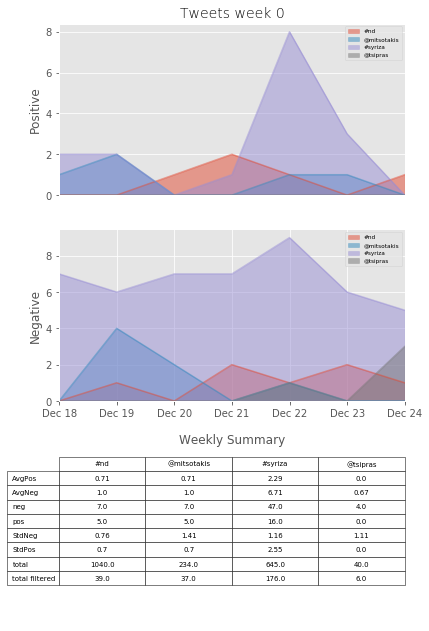

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

plot = summarize_specific_week(0,db)

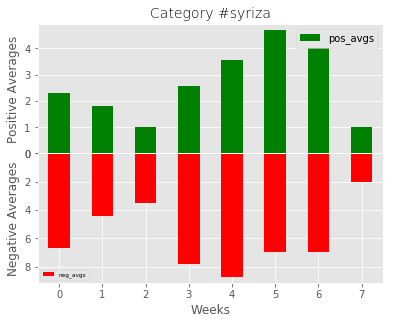

In [3]:
plot = plot_intertemporal('#syriza', db)

### SVD Ανάλυση
> _αρχείο_: svd_analysis.py

Επειδή τα φιλτραρισμένα tweets δεν ήταν πάρα πολλά χρησιμοποιήθηκαν τα φιλτραρισμένα tweets όλων των βδομάδων για την ανάλυση. Συγκεκριμμένα γίνονται τα εξής:
1. SVD ανάλυση όρων:
  * Με χρήση του TfidfVectorizer γίνεται καταμέτρηση και των υπολογισμός του tfidf score για όλους τους όρους που εμφανίζονται στα καθαρά tweets παραπάνω από δύο φορές. 
  * Πάνω στον πίνακα term x tweet που δημιουργείται εφαρμόζεται svd με k=300 (είναι μια τιμή που είναι γενικά αποδεκτή. Μάλιστα σε σύγκριση με άλλες π.χ. 150 δουλεύει καλύτερα) και από τους πίνακες που προκύπτουν διατηρείται μόνο ο U που αντιπροσωπεύει τους όρους. 
  * Δημιουργείται ο μειωμένης διάστασης U, με διατήρηση μόνο των 300 πρώτων στηλών του.
  * Ο πίνακας U νορμαλοποιείται με την χρήση Ευκλείδειας νόρμας.
  * Υπολογίζεται ο U dot U.transpose πίνακας, ο οποίος όχι μόνο αναπαριστά την συσχέτιση όλων των όρων μεταξύ τους, αλλά πιο συγκεκριμένα το cosine similarity τους λόγω της νορμαλοποίησης.
2. Δημιουργία νέων λεξικών:
  * Για κάθε όρο του similarity πίνακα ο οποίος ανήκει είτε στο θετικό είτε στο αρνητικό λεξικό όρων υπολογίζεται η γειτονιά του (πιο κοντινοί όροι εκτός του εαυτού του) μεγέθους p
  * Οι όροι της γειτονιάς τοποθετούνται σε ένα νέο λεξικό πολικότητας ίδιας με τον βασικό όρο.
  * Αφού πραγματοποιηθεί αυτό για όλους τους όρους του similarity  πίνακα γίνεται υπολογισμός του μέσου όρου των γειτόνων κάθε όρου που πράγματι ανήκαν στο αντίστοιχο θετικό ή αρνητικό αρχικό λεξικό.  
  
Η δεύτερη διαδικασία επαναλαμβάνεται για διάφορα μεγέθη γειτονιάς και τα αποτελέσματα (νέα λεξικά και μέσοι όροι) είναι αυτά που ακολουθούν.

In [4]:
from code_files.summarize_week import *
from code_files.svd_analysis import *
from code_files.preprocessing import *


neg_w, neg_dict = init_dict('code_files/dictionaries/neg_lex.txt')
pos_w, pos_dict = init_dict('code_files/dictionaries/pos_lex.txt')
db = import_db_to_memory('code_files/collections/weeks.json')
U, voc = svd_analyze(db)
term_term = np.dot(U,U.T)

in_pos_avg = []
in_neg_avg = []
num_of_neighbors = [1, 2, 4, 5, 10]
for p in num_of_neighbors :
    p, n = neighbors(term_term, p, voc,  neg_dict, pos_dict)
    in_pos_avg.append(p)
    in_neg_avg.append(n)


**********************************************************************************************

For  1  neighbors: 

New positive words' set: 

ΑΠΟΔΟΧ              ΑΦΗΣΤ               ΑΦΙΣ                ΓΥΦΤ                ΔΗΜΟΣΙΟΓΡΑΦΙ        

ΔΙΑΧΩΡΙΣΤΙΚ         ΕΛΕΥΘΕΡ             ΕΞΑΡΧΕΙ             ΕΠΙΔΟΜ              ΕΠΙΠΛΕ              

ΕΥΧΗΘ               ΕΦΑΓ                ΗΡΑΚΛΕΙ             ΚΑΤΑΣΤΡΟΦΙΚ         ΚΕΝΤΡΟΔΕΞΙ          

ΚΟΡ                 ΜΑΤΙ                ΜΕΛΛ                ΜΟΥΡΟΥΤ             ΜΠΑΚΟΓΙΑΝΝ          

ΜΥΝΗΜ               ΝΟΜΑΡΧΙΑΚ           ΟΦΕΙΛΕΤ             ΠΑΙΖ                ΠΑΝΙΩΝΙ             

ΠΑΡΑΣΚΕΥ            ΠΑΤΕΡ               ΠΕΤΡΟΠΟΥΛ           ΠΙΤ                 ΠΛΕΟΝΕΚΤΗΜ          

ΠΟΛΕΜ               ΣΕΙΡ                ΣΚΛΗΡ               ΣΥΡΙΧΑΝΕΛ           ΤΟΠΙΚ               

ΤΡΑΒΗΞ              ΤΡΕΛ                ΥΠΟΥΡΓ              ΦΑΝ                 ΦΘΙΩΤΙΔ             

ΦΡΑΓΜ               ΦΥΛΑΚ              

In [5]:
import pandas as pd

dfp = pd.DataFrame(data = in_pos_avg, index = num_of_neighbors, columns = ['extPos'])
dfn = pd.DataFrame(data = in_neg_avg, index = num_of_neighbors, columns = ['extNeg'])
df = dfp.join(dfn)
df

,extPos,extNeg
1,0.022222,0.060606
2,0.066667,0.151515
4,0.222222,0.383838
5,0.244444,0.515152
10,0.555556,1.090909


#### Συμπεράσματα

Όπως φαίνεται και παραπάνω καθώς μεγαλώνει η γειτονιά μεγαλώνει και ο μέσος όρος των όρων που ανήκουν ήδη σε αντίστοιχο λεξικό.
Παρόλα αυτά, επειδή οι νέοι όροι είναι πολλοί, είτε επειδή πράγματι είναι καινούργιοι είτε επειδή το stemming είναι ελλειπές (πολλές φορές για παράδειγμα για έμφαση σε μια λέξη κάποιο γράμμα, πολλές φορές το τελευταίο επαναλαμβάνεται, οπότε το stemming δεν θα βρεί το πραγματικό stem της λέξης) τελικά το πλήθος των όρων που όντως υπάρχουν σε αντίστοιχο λεξικό είναι πολύ μικρό. Αυτό δεν είναι απαραίτητα περίεργο, αφού τα λεξικά που χρησιμοποιούνται μπορεί να προέρχονται από διαφορετικό context. Επίσης ίσως δεν είναι επαρκές το πλήθος των "καθαρών" tweets για μια καλή ανάλυση τέτοιου επιπέδου, δεδομένου μάλιστα ότι πολλά tweets περιέχουν πολλά hashtags αναλογικά με το περιεχόμενο του κειμένου και έχουν όριο χαρακτήρων που περιορίζει το πλήθος των λέξεων που εξάγουμε.

Σε περίπτωση επομένως που θέλουμε να επεκτείνουμε το λεξικό μας, μια τεχνική είναι να δημιουργήσουμε μικρές τέτοιες γειτονιές. Μάλιστα με ίσως μια λίγο καλύτερη προσέγγιση όπως το LSI θα μπορούσαμε να χρησιμοποιήσουμε με παρόμοια λογική το svd με περισσότερη ακρίβεια. Όπως προαναφέρθηκε βέβαια πολύ σημαντικό ρόλο παίζει το καλό stemming σε συνδιασμό με κάποιο φιλτράρισμα των λέξεων ώστε να διαγράφονται διπλά γράμματα κτλ.  

Εντούτοις παρατηρήθηκε λέξεις που παραπέμπουν σε αρνητικές έννοιες (π.χ. ΚΑΤΑΣΤΡΟΦΙΚ) να κατατάσσονται στο νέο λεξικό θετικών όρων και το αντίστροφο. Παρόλο που πράγματι μπορεί οι τάσεις της εποχής να αντιμετωπίζουν θετικά ή αρνητικά κάποιες έννοιες, υπάρχει περίπτωση οι γειτονιές που βρίσκουμε να μην κάνουν τόσο καλό διαχωρισμό της πολικότητας (κακή ομαδοποίηση). Συνεπώς θα πρέπει να υπολογιστούν κι άλλες μετρικές, όπως για παράδειγμα ο μέσος όρος των γειτόνων που άνηκαν στο αντίθετο λεξικό. Τέλος όσο πιο μεγάλη είναι μια γειτονιά, όχι μόνο είναι πιο πιθανά τα λάθη, αλλά μπορεί το αποτέλεσμα να είναι και λιγότερο stable σε βάθος χρόνου (π.χ. αυτή τη βδομάδα η λέξη χ μπορεί να έχει θετικό αντίκτυπο και σε δύο εβδομάδες αρνητικό), επομένως για επέκταση λεξικού ίσως μικρές γειτονιές είναι καλύτερες.  



### Λοιπές Παρατηρήσεις/Σχόλια

Ο φάκελος της εργασίας περιλαμβάνει:

1. Την αναφορά: report_project_part2.ipynb
2. Το pdf με τα summaries: summaries.pdf
3. Τον φάκελο code_files με τα αρχεία κώδικα που περιέχει:  
    1. Τα αρχεία :
        * COMMA.py
        * db_helpers.py
        * preprocessing.py
        * summarize_day.py
        * summarize_week.py
        * svd_analysis.py
    2. Το φάκελο reminders με τα αρχεία που απαιτούνται για την ορθή συλλογή των tweets
    3. To φάκελο collections με τα .json αρχεία tweets_round2.json και weeks.json που αποθηκεύουν αντίγραφα των συλλογών της βάσης
    4. Το φάκελο dictionaries με τα αρχεία λεξικών που έχουν δωθεί στην μορφή που χρειάστηκε για να αξιοποιηθούν στην εργασία  
    
Θεώρησα πως ήταν καλύτερα να στείλω τα αρχεία αντί να τα παραθέσω εδώ λόγω έκτασης κώδικα και πιθανών δυσλειτουργιών που θα εμφάνιζαν στο notebook. Επιπλέον δεν ανέλυσα παραπάνω τα διαγράμματα των περιλήψεων γιατί θεώρησα τα αποτελέσματα αρκετά εμφανή από τα διαγράμματα.
